Project Title : Credit Card Default Prediction

Technologies : Machine Learning

Domain : Banking
## Problem Statement:
Financial threats are displaying a trend about the credit risk of commercial banks as the
incredible improvement in the financial industry has arisen. In this way, one of the
The biggest threats faced by commercial banks is the risk prediction of credit clients.
The goal is to predict the probability of credit default based on credit card owner's
characteristics and payment history.
## Approach:
The classical machine learning tasks like Data Exploration, Data Cleaning,
Feature Engineering, Model Building and Model Testing. Try out different machine
learning algorithms that’s best fit for the above case.
## Results:
You have to build a solution that should able to predict the probability of credit
default based on credit card owner’s characteristics and payment history.
## Dataset:
## Dataset Link: Card Default Data
## Project Evaluation metrics:
## Code:
• You are supposed to write a code in a modular fashion (in functional blocks)
• Maintainable: It can be maintained, even as your codebase grows.
• Portable: It works the same in every environment (operating system)
• You have to maintain your code on GitHub.
• You have to keep your GitHub repo public so that anyone can check your code.
• Proper readme file you have to maintain for any project development.
• You should include basic workflow and execution of the entire project in the readme
file on GitHub
• Follow the coding standards: https://www.python.org/dev/peps/pep-0008/
About Dataset
## Dataset Information
This dataset contains information on default payments, demographic factors, credit
data, history of payment, and bill statements of credit card clients in Taiwan from April
2005 to September 2005.
## Content
There is 25 Variable:
● ID: ID of each client

● LIMIT_BAL: Amount of given credit in NT dollars (includes individual and
family/supplementary credit

● SEX: Gender (1=male, 2=female)

● EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others,
5=unknown, 6=unknown)

● MARRIAGE: Marital status (1=married, 2=single, 3=others)

● AGE: Age in years

● PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for
one month, 2=payment delay for two months, … 8=payment delay for eight
months, 9=payment delay for nine months and above)

● PAY_2: Repayment status in August, 2005 (scale same as above)

● PAY_3: Repayment status in July, 2005 (scale same as above)

● PAY_4: Repayment status in June, 2005 (scale same as above)

● PAY_5: Repayment status in May, 2005 (scale same as above)

● PAY_6: Repayment status in April, 2005 (scale same as above)

● BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

● BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

● BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

● BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

● BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

● BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

● PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

● PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

● PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

● PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

● PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

● PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

● default.payment.next.month: Default payment (1=yes, 0=no)

## Inspiration
Some ideas for exploration:
1. How does the probability of default payment vary by categories of different
demographic variables?
2. Which variables are the strongest predictors of default payment

## Note: 
After completion of all the task you need to create a PowerPoint presentation
That should contain the :
1. Problem Statement
2. Tools Used
3. Approaches
4. EDA Insights
5. Best ML Model
6. Evaluation Metrics of Model
7. Future Development

## Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

## Loading the Dataset

In [4]:
data = pd.read_csv("UCI_Credit_Card.csv")

## Exploratory Data Analysis(EDA)

In [5]:
data.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [6]:
#Checking for null values
null_val = data.isna().sum().sum()
print("Total no. of Null Values are : ",null_val)

Total no. of Null Values are :  0


In [7]:
data_eda = data.copy()

In [8]:
#Replacing numberical columns to text for EDA
data_eda['SEX'] = data_eda['SEX'].replace({1:'Male',2:'Female'})
data_eda['EDUCATION'] = data_eda['EDUCATION'].replace({1:'Graduate School',2:'University',3:'High School',4:'Others',5:'Others',6:'Others',0:'Others'})
data_eda['MARRIAGE'] = data_eda['MARRIAGE'].replace({1:'Married',2:'Single',3:'Others',0:'Others'})
data_eda['default.payment.next.month'] = data_eda['default.payment.next.month'].replace({1:'Yes',0:'No'})

In [9]:
data_eda.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,Female,University,Married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,Yes
1,2,120000.0,Female,University,Single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,Yes
2,3,90000.0,Female,University,Single,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,No
3,4,50000.0,Female,University,Married,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,No
4,5,50000.0,Male,University,Married,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,No


C:\Users\Jayaprakash\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


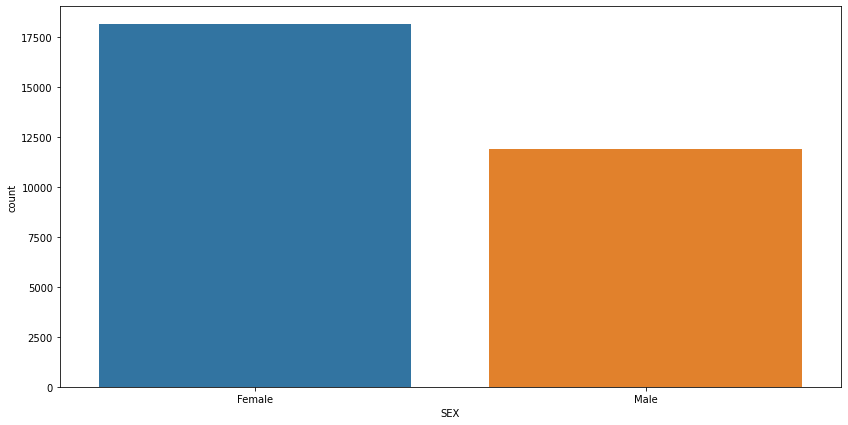

C:\Users\Jayaprakash\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


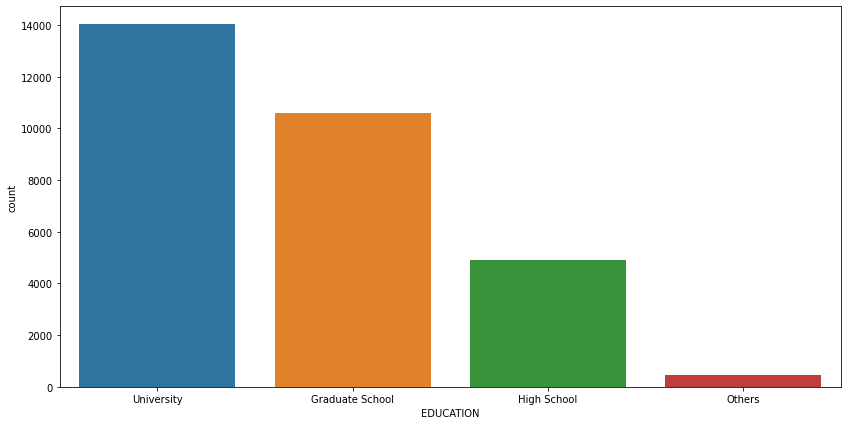

C:\Users\Jayaprakash\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


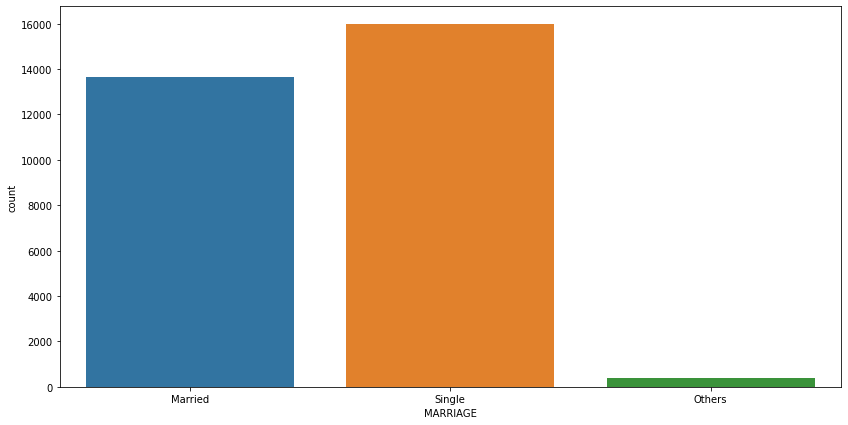

C:\Users\Jayaprakash\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


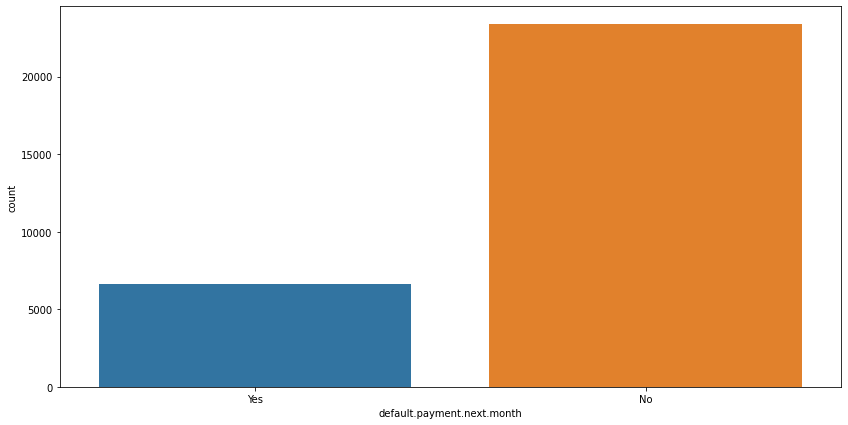

In [10]:
#Plotting the Categorical columns
for column in data_eda.columns:
    if data_eda[column].dtype == object:
        plt.figure(figsize=(14,7))
        sns.countplot(data_eda[column])
        plt.show()


C:\Users\Jayaprakash\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


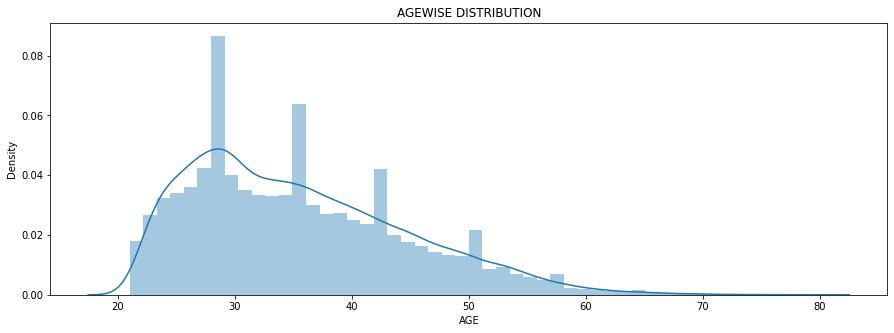

In [11]:
plt.figure(figsize=(15,5))
plt.title('AGEWISE DISTRIBUTION')
sns.distplot(data_eda['AGE'])
plt.show()

C:\Users\Jayaprakash\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


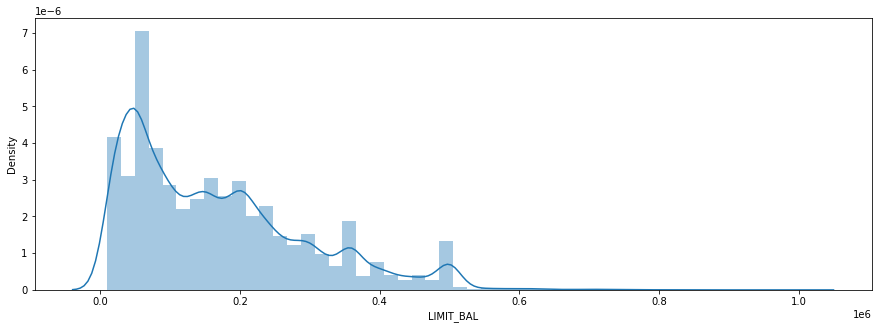

In [12]:
plt.figure(figsize=(15,5))
sns.distplot(data_eda['LIMIT_BAL'])
plt.show()

## Feature vs Target

In [13]:
fig=px.bar(data_eda,x='SEX',color='default.payment.next.month',barmode='group')
fig.update_traces(marker_line_width = 0,selector=dict(type="bar"))

In [14]:
fig=px.bar(data_eda,x='EDUCATION',color='default.payment.next.month',barmode='group')
fig.update_traces(marker_line_width = 0,selector=dict(type="bar"))

In [15]:
fig=px.bar(data_eda,x='MARRIAGE',color='default.payment.next.month',barmode='group')
fig.update_traces(marker_line_width = 0,selector=dict(type="bar"))

<AxesSubplot:>

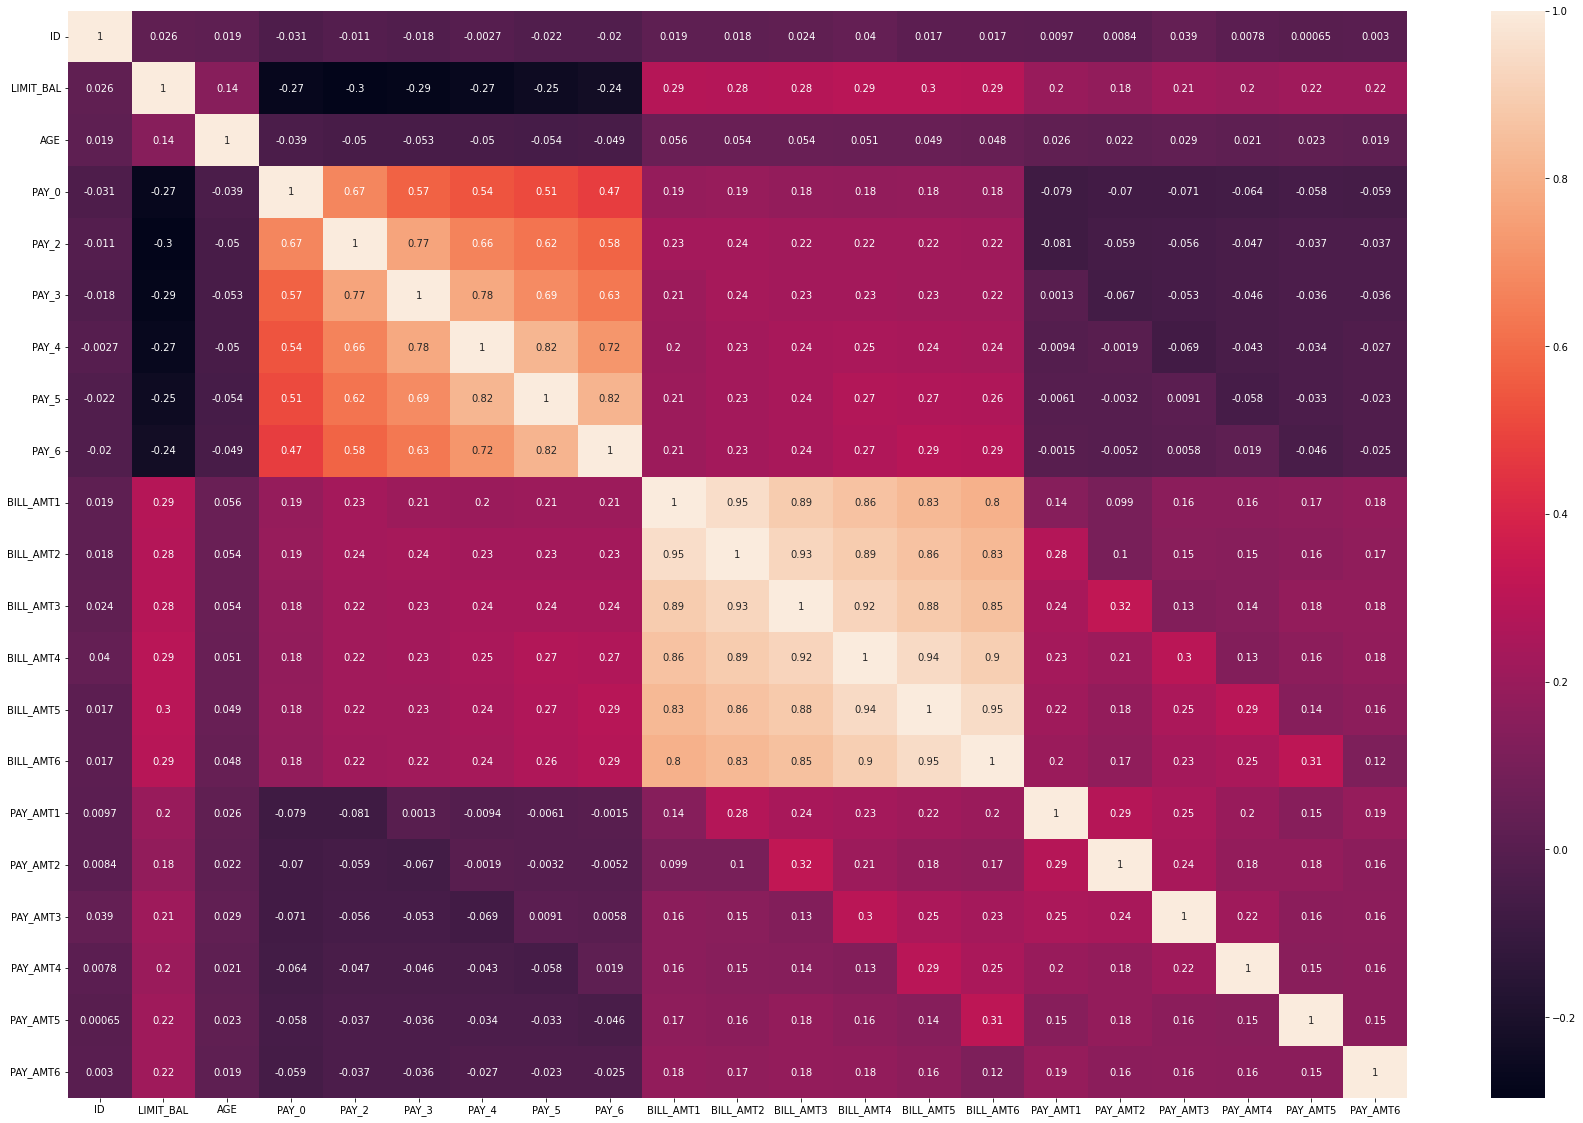

In [16]:
plt.subplots(figsize=(30,20))
sns.heatmap(data_eda.corr(),annot=True)

## Features and Target Selection

In [18]:
#Features
X = data.drop(columns=['default.payment.next.month'])

In [23]:
X.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [34]:
#Target
Y = data['default.payment.next.month']

# Splitting the Dataset

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3, random_state=10)

# ML MODELS

# Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error
from sklearn.metrics import ConfusionMatrixDisplay

In [38]:
logisticreg = LogisticRegression()

In [39]:
#fitting the data
logisticreg.fit(x_train,y_train)
#predicting
y_pred = logisticreg.predict(x_test)

In [40]:
#finding the score of the model
log_score=logisticreg.score(x_test,y_test)
print('Logistic Regression Model score is :',log_score*100,'%')

Logistic Regression Model score is : 77.56666666666666 %


<Figure size 720x720 with 0 Axes>

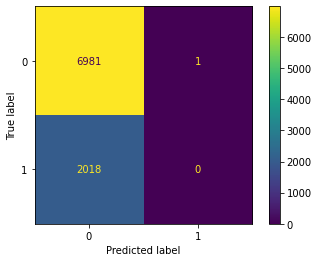

In [41]:
#plotting the confsion matrix
plt.figure(figsize=(10,10))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.show()

In [42]:
classification_report(y_pred,y_test)

'              precision    recall  f1-score   support\n\n           0       1.00      0.78      0.87      8999\n           1       0.00      0.00      0.00         1\n\n    accuracy                           0.78      9000\n   macro avg       0.50      0.39      0.44      9000\nweighted avg       1.00      0.78      0.87      9000\n'

## Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
decisiontree=DecisionTreeClassifier()
#fitting the model
decisiontree.fit(x_train,y_train)
#predicting the target value
y_pred=decisiontree.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [45]:
#finding the score of the model
dt_score=decisiontree.score(x_test,y_test)
print('Decision Tree Model score is :',dt_score*100,'%')

Decision Tree Model score is : 72.04444444444445 %


## Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
randomforest=RandomForestClassifier(max_depth=10,n_estimators=250,random_state=134)
#fitting the model
randomforest.fit(x_train,y_train)
#predicting the target value
y_pred=randomforest.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [48]:
#finding the score of the model
rf_score=randomforest.score(x_test,y_test)
print('Random Forest Model score is :',rf_score*100,'%')

Random Forest Model score is : 82.03333333333333 %


<Figure size 720x720 with 0 Axes>

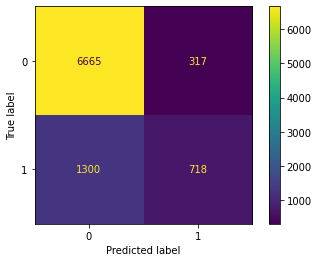

In [49]:
plt.figure(figsize=(10,10))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.show()

## Support Vector Classifier

In [50]:
from sklearn import svm
svc = svm.SVC(kernel='rbf', gamma='scale')

In [51]:
#fitting the model
svc.fit(x_train, y_train)
#Predicting the target value
ypred = svc.predict(x_test)
ypred[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [52]:
#finding the score of the model
svc_score=svc.score(x_test,y_test)
print('Support Vector Classifier score is :',svc_score*100,'%')

Support Vector Classifier score is : 77.57777777777778 %


## ADA BOOST

In [53]:
from sklearn.ensemble import AdaBoostClassifier

In [54]:
ada=AdaBoostClassifier(n_estimators=150,random_state=10)
#fitting the model
ada.fit(x_train,y_train)
#predicting the target value
y_pred=ada.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [55]:
#finding the score of the model
ada_score=ada.score(x_test,y_test)
print('Ada Boost Model score is :',ada_score*100,'%')

Ada Boost Model score is : 82.0 %


## Gradient Boosting

In [56]:
from sklearn.ensemble import GradientBoostingClassifier

In [57]:
#fitting the model
GradientBoosting = GradientBoostingClassifier()
GradientBoosting.fit(x_train,y_train)
#predicting the target value
y_pred=GradientBoosting.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [58]:
#finding the score of the model
GradientBoosting_score = GradientBoosting.score(x_test,y_test)
print('Gradient Boosting Model score is :',GradientBoosting_score*100,'%')

Gradient Boosting Model score is : 82.0111111111111 %


## KNN

In [59]:
from sklearn.neighbors import KNeighborsClassifier

In [60]:
K = 10
mean_acc = np.zeros((K-1))
std_acc = np.zeros((K-1))
ConfustionMx = [];
for n in range(1,K):
  
   #Train Model and Predict 
   neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
   yhat=neigh.predict(x_test)
   mean_acc[n-1] =accuracy_score(y_test, yhat)
 
  
   std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
 
mean_acc

array([0.67888889, 0.75855556, 0.72666667, 0.76066667, 0.74355556,
       0.76222222, 0.75511111, 0.76433333, 0.75588889])

In [61]:
print( "The best accuracy was with", mean_acc.max()*100, "% with k=", mean_acc.argmax()+1)

The best accuracy was with 76.43333333333334 % with k= 8


## Finding the Best Model

In [62]:
print('Logistic Regression Model score is :',log_score*100,'%')
print('Decision Tree Model score is :',dt_score*100,'%')
print('Random Forest Model score is :',rf_score*100,'%')
print('Support Vector Classifier score is :',svc_score*100,'%')
print('Ada Boost Model score is :',ada_score*100,'%')
print('Gradient Boosting Model score is :',GradientBoosting_score*100,'%')
print('Best KNN Model score is :',mean_acc.max()*100,'%')

Logistic Regression Model score is : 77.56666666666666 %
Decision Tree Model score is : 72.04444444444445 %
Random Forest Model score is : 82.03333333333333 %
Support Vector Classifier score is : 77.57777777777778 %
Ada Boost Model score is : 82.0 %
Gradient Boosting Model score is : 82.0111111111111 %
Best KNN Model score is : 76.43333333333334 %


## Feature Importance

In [63]:
feature_scores = pd.Series(randomforest.feature_importances_,index=x_train.columns).sort_values(ascending=False)
feature_scores = feature_scores*100
feature_scores

PAY_0        23.860147
PAY_2        10.366742
PAY_3         6.003519
PAY_4         4.681273
PAY_5         4.480228
PAY_AMT1      4.006143
BILL_AMT1     3.777272
LIMIT_BAL     3.450235
ID            3.424564
BILL_AMT2     3.188707
PAY_6         3.173327
PAY_AMT3      3.144318
PAY_AMT2      3.093469
BILL_AMT4     2.795706
BILL_AMT3     2.789231
BILL_AMT6     2.732520
AGE           2.687930
BILL_AMT5     2.671851
PAY_AMT4      2.652816
PAY_AMT5      2.539845
PAY_AMT6      2.521066
EDUCATION     0.952702
MARRIAGE      0.575478
SEX           0.430912
dtype: float64

<AxesSubplot:>

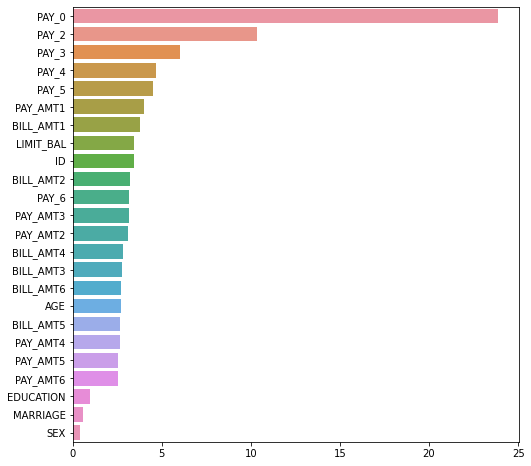

In [64]:
#plotting the feature importance
plt.figure(figsize=(8,8))
sns.barplot(x=feature_scores,y=feature_scores.index)

In [65]:
#filtering the important featres
main_features=feature_scores.loc[feature_scores >2]
main_features

PAY_0        23.860147
PAY_2        10.366742
PAY_3         6.003519
PAY_4         4.681273
PAY_5         4.480228
PAY_AMT1      4.006143
BILL_AMT1     3.777272
LIMIT_BAL     3.450235
ID            3.424564
BILL_AMT2     3.188707
PAY_6         3.173327
PAY_AMT3      3.144318
PAY_AMT2      3.093469
BILL_AMT4     2.795706
BILL_AMT3     2.789231
BILL_AMT6     2.732520
AGE           2.687930
BILL_AMT5     2.671851
PAY_AMT4      2.652816
PAY_AMT5      2.539845
PAY_AMT6      2.521066
dtype: float64

In [66]:
x=data[main_features.index]

## Training Best Model with Important Features

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,Y,test_size=0.2, random_state=20)

In [68]:
randomforest=RandomForestClassifier(max_depth=10,n_estimators=250,random_state=134)
#fitting the model
randomforest.fit(x_train,y_train)
#predicting the target value
y_pred=randomforest.predict(x_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [69]:
#finding the score of the model
rf_score=randomforest.score(x_test,y_test)
print('Random Forest Model score is :',rf_score*100,'%')

Random Forest Model score is : 82.28333333333333 %
